#**Look-back Forecasting**

***Prepared by:*** [**Manisa Pipattanasomporn**](https://mpipatta.github.io)

*Created: January 1, 2020 (updated: March 6, 2020)*

The simplest method for load forecasting is to use the look-back method. This means we will predict **Lt** using **Lt-1**. Then, we will calculate error metrics, using **Root Mean Square Error (RMSE)** and **Mean Average Percentage Error (MAPE)**.



---



# **1. Load data**

This notebook will work with "Bangkok.csv", the electrical consumption of a building at one-hour intervals for one year.

In [0]:
# We will use the following Python libraries: Pandas, Numpy and Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url ='https://raw.githubusercontent.com/mpipatta/mpipatta.github.io/master/testdata/Bangkok.csv'
df = pd.read_csv(url, index_col=[0], parse_dates=[0])[['Load']]
df.head(5)
#We will parse the first column (col=[0]) as the index column as the date. 
#The 'Load' column will be saved in the dataframe df.
#Note: the 'Load' is in kilo-Watt (kW).

,Load
Time,
2016-01-01 00:00:00,4.30
2016-01-01 01:00:00,4.12
2016-01-01 02:00:00,4.06
2016-01-01 03:00:00,4.44
2016-01-01 04:00:00,3.88


In [3]:
#Check the info. 
#We can see that we have "Datetime" as the index column.
#Data are from January 1, 2016 to December 31, 2016.
#This is a leap year. Thus, we have 8784 hours of data.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 1 columns):
Load    8784 non-null float64
dtypes: float64(1)
memory usage: 137.2 KB


#**2. Data Exploration**
Let us now visualize the data.

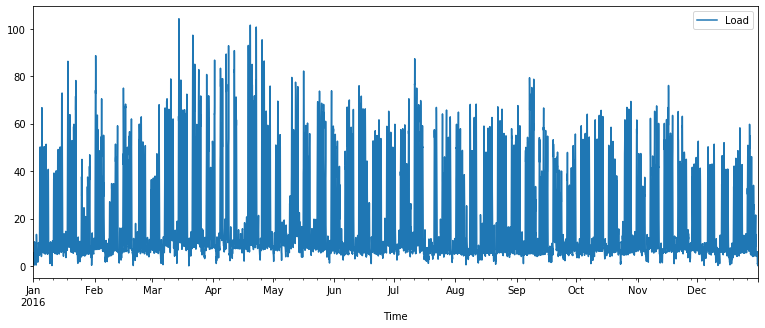

In [4]:
df.plot(figsize=(13,5))

Text(0, 0.5, 'load (kW)')

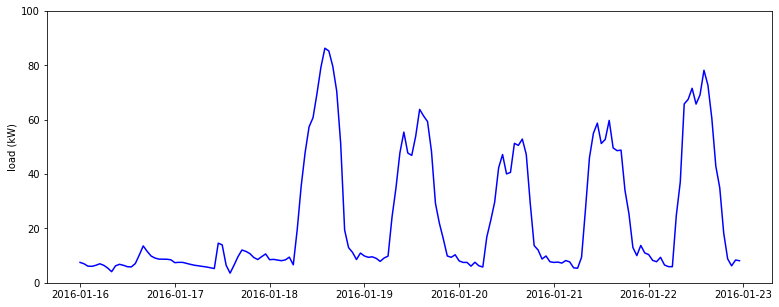

In [5]:
plt.figure(figsize=(13,5))
#plt.style.use('bmh')
n=2 #number of week
plt.plot(df[n*24*7+24:(n+1)*24*7+24],'b')
plt.ylim([0,100])
plt.ylabel('load (kW)')

In [6]:
#Let us check pearson correlation coefficient
#we can use .shift(1) to create time-lag data
df1 = pd.concat([df, df.shift(1)], axis=1)
df1.columns = ['Lt','Lt-1']
df1.head(10)

,Lt,Lt-1
Time,,
2016-01-01 00:00:00,4.30,NaN
2016-01-01 01:00:00,4.12,4.30
2016-01-01 02:00:00,4.06,4.12
2016-01-01 03:00:00,4.44,4.06
2016-01-01 04:00:00,3.88,4.44
2016-01-01 05:00:00,5.62,3.88
2016-01-01 06:00:00,3.50,5.62
2016-01-01 07:00:00,3.06,3.50
2016-01-01 08:00:00,1.38,3.06


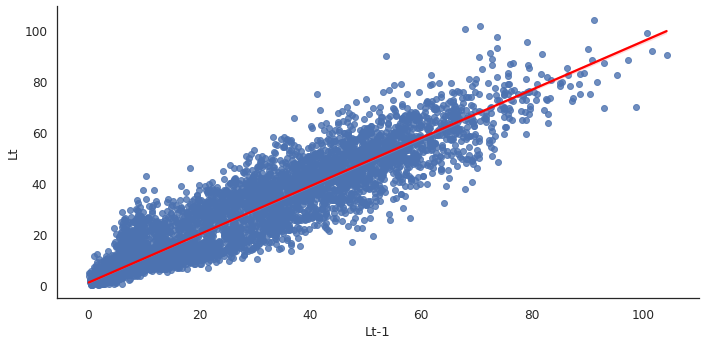

In [7]:
#You can also do lmplot
import seaborn as sns
sns.set(font_scale=1.1)
sns.set_style('white')
sns.lmplot(x='Lt-1', y='Lt', data=df1, line_kws={'color': 'red'}, aspect=2)
#more info: https://www.codecademy.com/articles/seaborn-design-i

In [8]:
#Then, we can use .corr() to find person correlation coefficient
#Pearson correlation summarizes how correlated two variables are.
#The values are between -1 (negatively correlated) and +1 (positively correlated).
#High values above 0.5 or below -0.5 show high correlation.
df1.corr()

,Lt,Lt-1
Lt,1.000000,0.946887
Lt-1,0.946887,1.000000


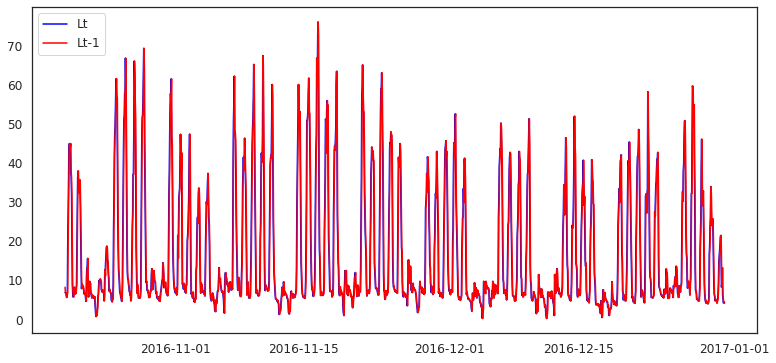

In [9]:
#check Lt vs Lt-1
plt.figure(figsize=(13,6))
#plt.style.use('classic')
plt.plot(df1['Lt'][24*293:24*365], 'blue', label='Lt')
plt.plot(df1['Lt-1'][24*293:24*365], 'red', label='Lt-1')
plt.legend(loc='upper left')

# **3. Prepare Test Data**


In [10]:
#Prepare test data (Lt)
#Test data is the last 20% of the entire dataset
n = int(df1.shape[0]*0.8)
n1= df1.shape[0]
data = df1.iloc[n:n1,:]
data.head()

,Lt,Lt-1
Time,,
2016-10-19 19:00:00,6.12,14.88
2016-10-19 20:00:00,5.88,6.12
2016-10-19 21:00:00,8.62,5.88
2016-10-19 22:00:00,8.57,8.62
2016-10-19 23:00:00,8.25,8.57


In [0]:
L_predict = data['Lt-1'].values
L_t        = data['Lt'].values  

# **4. Calculate RMSE and MAPE**

In [12]:
RMSE = np.sqrt(np.mean(np.square(L_t-L_predict)))
RMSE

5.0860192435023786

In [13]:
MAPE = np.mean(np.abs((L_t-L_predict)/L_t))*100
MAPE

22.029930062705162

In [14]:
type(L_t)

numpy.ndarray

In [0]:
a=np.array([1,2,3])
b=np.array([1.1,2.1,3.1])

In [16]:
np.square(a-b)

array([0.01, 0.01, 0.01])

In [17]:
np.mean(np.square(a-b))

0.010000000000000018

In [18]:
np.square(np.mean(np.square(a-b)))

0.00010000000000000036